In [1]:
import sys
sys.path.insert(0,'./src/')

from curve import *
from utility_and_spec import *
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
from tube import *
import pickle
from abstractPipe import *
from pipe_system import *


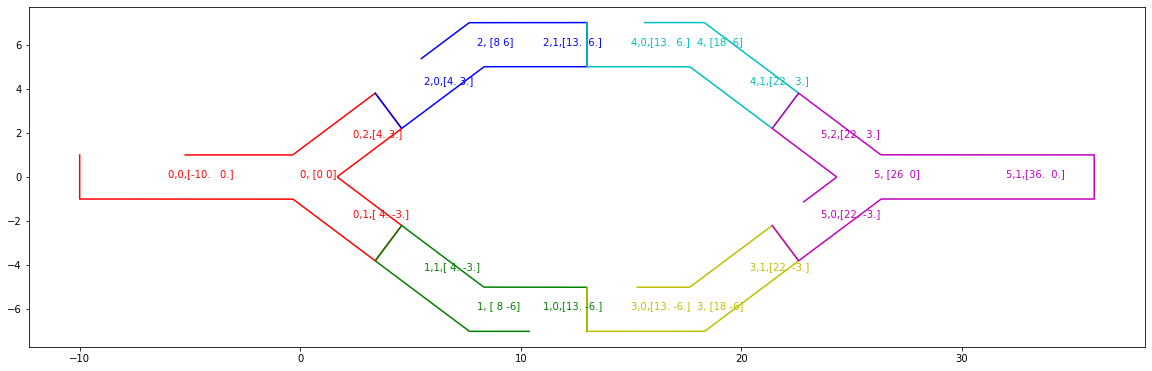

In [2]:
pipes = pickle.load(open('dev_Pipes.pickle','rb'))
shifts = pickle.load(open('dev_Shifts.pickle','rb'))
color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    ax.plot(*(i.boundary + j).T,c=c)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{a},{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)

In [3]:
bdr_pipe = BoundaryPipe([BoundaryLet(-10,0,0,2,1),BoundaryLet(36,0,np.pi,2,-1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)

In [4]:
ps.A

array([[ 1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.        ,  0.        ],
       [-1.        ,  0.        , -1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -1.        ,  0.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.        ,
         0.        ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        ,  0.        , -1.        ],
       [ 3.78284546,  5.47980757

In [8]:
ps.n_flows

8

In [10]:
ps.b.shape

(9,)

In [7]:
ps.A.shape

(9, 8)

In [5]:
fluxes = np.linalg.solve(ps.A,ps.b)

LinAlgError: Last 2 dimensions of the array must be square

In [19]:
np.linalg.lstsq(ps.A,ps.b,rcond=1e-12)

(array([-0.73130493, -0.26869507,  0.73130493, -0.26869507, -0.73130493,
        -0.26869507, -1.        ,  0.26869507]),
 array([0.]),
 8,
 array([10.76145277,  2.08060512,  1.82820921,  1.60750227,  1.49884205,
         0.99179237,  0.84111484,  0.68832814]))

In [21]:
np.linalg.cond(ps.A[:-1])

3.8291245820048056e+16

In [20]:
ps.flow2edge

{(0,
  0): (Vertex(l1=LetIndex(pipeIndex=-1, letIndex=0), l2=LetIndex(pipeIndex=0, letIndex=0)), Vertex(l1=LetIndex(pipeIndex=0, letIndex=1), l2=LetIndex(pipeIndex=1, letIndex=1))),
 (0,
  1): (Vertex(l1=LetIndex(pipeIndex=-1, letIndex=0), l2=LetIndex(pipeIndex=0, letIndex=0)), Vertex(l1=LetIndex(pipeIndex=0, letIndex=2), l2=LetIndex(pipeIndex=2, letIndex=0))),
 (1,
  0): (Vertex(l1=LetIndex(pipeIndex=1, letIndex=0), l2=LetIndex(pipeIndex=3, letIndex=0)), Vertex(l1=LetIndex(pipeIndex=0, letIndex=1), l2=LetIndex(pipeIndex=1, letIndex=1))),
 (2,
  0): (Vertex(l1=LetIndex(pipeIndex=0, letIndex=2), l2=LetIndex(pipeIndex=2, letIndex=0)), Vertex(l1=LetIndex(pipeIndex=2, letIndex=1), l2=LetIndex(pipeIndex=4, letIndex=0))),
 (3,
  0): (Vertex(l1=LetIndex(pipeIndex=1, letIndex=0), l2=LetIndex(pipeIndex=3, letIndex=0)), Vertex(l1=LetIndex(pipeIndex=3, letIndex=1), l2=LetIndex(pipeIndex=5, letIndex=0))),
 (4,
  0): (Vertex(l1=LetIndex(pipeIndex=2, letIndex=1), l2=LetIndex(pipeIndex=4, letIndex=0)